In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
file1 = "/home/jstancz/data/UFS_anom_reshaped2.nc"
file2 = "/home/jstancz/data/Precip_index_reshaped.nc"

In [3]:
ufs = xr.open_dataset(file1)
p_index = xr.open_dataset(file2)

In [4]:
ufs

<xarray.Dataset> Size: 247MB
Dimensions:       (time: 5880, latitude: 73, longitude: 144)
Coordinates:
  * latitude      (latitude) float32 292B -90.0 -87.5 -85.0 ... 85.0 87.5 90.0
  * longitude     (longitude) float32 576B 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time          (time) datetime64[ns] 47kB 2011-04-01 ... 2018-04-18
    forecast_day  (time) int64 47kB ...
Data variables:
    prate_anoms   (time, latitude, longitude) float32 247MB ...

In [5]:
# Parameters
forecast_days = 35
n_init = len(ufs['time']) // forecast_days  # Calculate the number of initializations

# Reshape the data array
reshaped_data = ufs['prate_anoms'].data.reshape(
    n_init, forecast_days, ufs.dims['latitude'], ufs.dims['longitude']
)

# Create a new 'init' coordinate
init_times = ufs['time'].values[::forecast_days]  # Select every 35th time as initialization

# Build the reshaped DataArray
ufs = xr.DataArray(
    data=reshaped_data,
    coords={
        'init': init_times,
        'time': np.arange(1, forecast_days + 1),  # Forecast days 1 to 35
        'latitude': ufs['latitude'],
        'longitude': ufs['longitude']
    },
    dims=['init', 'time', 'latitude', 'longitude']
)

/tmp/ipykernel_3994681/1020383412.py:7: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  n_init, forecast_days, ufs.dims['latitude'], ufs.dims['longitude']


In [6]:
ufs

<xarray.DataArray (init: 168, time: 35, latitude: 73, longitude: 144)> Size: 247MB
array([[[[ 2.71542877e-01,  2.71542877e-01,  2.71542877e-01, ...,
           2.71542877e-01,  2.71542877e-01,  2.71542877e-01],
         [ 4.98651415e-02,  3.35725844e-02,  2.17234343e-02, ...,
           1.29106298e-01,  9.84960049e-02,  6.96137249e-02],
         [-1.18738294e-01, -1.48608014e-01, -1.81193143e-01, ...,
          -3.48068476e-02, -6.66514337e-02, -9.23245847e-02],
         ...,
         [-7.60320127e-02, -1.08123437e-01, -1.54038861e-01, ...,
           7.65258074e-03, -2.91291475e-02, -6.19611517e-02],
         [-1.92301720e-01, -1.86377138e-01, -1.78724557e-01, ...,
          -2.04891413e-01, -2.07113132e-01, -1.98473126e-01],
         [-3.99908535e-02, -3.99908535e-02, -3.99908535e-02, ...,
          -3.99908535e-02, -3.99908535e-02, -3.99908535e-02]],

        [[ 3.00301731e-01,  3.00301731e-01,  3.00301731e-01, ...,
           3.00301731e-01,  3.00301731e-01,  3.00301731e-01],
         [ 3.91268432e-02,  4.61622775e-02,  5.41851372e-02, ...,
           4.88777161e-02,  4.61622775e-02,  3.77691686e-02],
         [-1.79465145e-01, -1.67739421e-01, -1.57988578e-01, ...,
          -2.09581718e-01, -1.94893703e-01, -1.82550862e-01],
...
          -3.53252560e-01, -3.17952007e-01, -2.67099440e-01],
         [-2.25133732e-01, -2.27108583e-01, -2.30564579e-01, ...,
          -2.06619427e-01, -2.14272007e-01, -2.21677706e-01],
         [-2.63149709e-01, -2.63149709e-01, -2.63149709e-01, ...,
          -2.63149709e-01, -2.63149709e-01, -2.63149709e-01]],

        [[ 5.35679936e-01,  5.35679936e-01,  5.35679936e-01, ...,
           5.35679936e-01,  5.35679936e-01,  5.35679936e-01],
         [ 6.82066262e-01,  6.70710862e-01,  6.62811399e-01, ...,
           8.04260552e-01,  7.56864011e-01,  7.14651465e-01],
         [ 1.59963444e-01,  1.46139443e-01,  1.32562280e-01, ...,
           4.06080008e-01,  3.03140581e-01,  2.02422857e-01],
         ...,
         [-2.81417161e-01, -2.72530288e-01, -2.70802289e-01, ...,
          -3.55967969e-01, -3.09558839e-01, -2.91785151e-01],
         [-3.02646846e-01, -2.94253677e-01, -2.84626275e-01, ...,
          -3.30048025e-01, -3.21408004e-01, -3.11780542e-01],
         [-3.35231990e-01, -3.35231990e-01, -3.35231990e-01, ...,
          -3.35231990e-01, -3.35231990e-01, -3.35231990e-01]]]],
      dtype=float32)
Coordinates:
  * init       (init) datetime64[ns] 1kB 2011-04-01 2011-04-15 ... 2018-03-15
  * time       (time) int64 280B 1 2 3 4 5 6 7 8 9 ... 28 29 30 31 32 33 34 35
  * latitude   (latitude) float32 292B -90.0 -87.5 -85.0 ... 85.0 87.5 90.0
  * longitude  (longitude) float32 576B 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5

In [7]:
p_index

<xarray.Dataset> Size: 165kB
Dimensions:       (time: 5880)
Coordinates:
  * time          (time) datetime64[ns] 47kB 2011-04-01 ... 2018-04-18
    dayofyear     (time) int64 47kB ...
    forecast_day  (time) int64 47kB ...
Data variables:
    p_mjo         (time) float32 24kB ...

In [8]:
# Build the reshaped DataArray

# Reshape the data array
reshaped_data2 = p_index['p_mjo'].data.reshape(
    n_init, forecast_days
)


p_index = xr.DataArray(
    data=reshaped_data2,
    coords={
        'init': init_times,
        'time': np.arange(1, forecast_days + 1),  # Forecast days 1 to 35
    },
    dims=['init', 'time']
)

In [9]:
p_index

<xarray.DataArray (init: 168, time: 35)> Size: 24kB
array([[ 0.45531195,  0.16101566, -0.143328  , ...,  2.1018455 ,
         2.4855084 ,  2.7400942 ],
       [-0.6604653 , -0.6034052 , -0.597725  , ..., -1.6754996 ,
        -1.7003696 , -1.5800846 ],
       [ 1.0892363 ,  1.6230959 ,  2.1018455 , ..., -0.5353082 ,
        -0.7652877 , -0.9176854 ],
       ...,
       [ 0.88733745,  0.65576935,  0.3753278 , ...,  0.26068008,
         0.15698132,  0.065277  ],
       [-0.73516047, -0.46443397, -0.18098046, ..., -0.20396043,
        -0.24885863, -0.31937188],
       [ 0.73562026,  0.6162225 ,  0.49396706, ..., -1.601168  ,
        -1.4351599 , -1.194547  ]], dtype=float32)
Coordinates:
  * init     (init) datetime64[ns] 1kB 2011-04-01 2011-04-15 ... 2018-03-15
  * time     (time) int64 280B 1 2 3 4 5 6 7 8 9 ... 27 28 29 30 31 32 33 34 35

In [10]:
#Average anomalies over 10S-10N for UFS data
lon_min = 0
lon_max = 360
lat_max = 10
lat_min = -10

# Define the months for December through April
selected_months = [12, 1, 2, 3]

# Slice the dataset for the specified time range and spatial bounds
ufs = ufs.sel(longitude=slice(lon_min, lon_max),latitude=slice(lat_min, lat_max))


ufs = ufs.mean(dim=['latitude'])

In [11]:
ufs

<xarray.DataArray (init: 168, time: 35, longitude: 144)> Size: 3MB
array([[[-4.0904230e-01, -3.8303998e-01, -4.9138287e-01, ...,
         -1.3275977e+00, -1.0916023e+00, -1.3155568e+00],
        [-2.7941761e+00, -2.1661577e+00, -1.9483610e+00, ...,
         -1.3055451e+00, -2.5539703e+00, -2.7755249e+00],
        [-1.5975224e+00,  5.5186272e-02, -6.0381263e-01, ...,
         -1.0931931e+00, -1.5944915e+00, -2.1349990e+00],
        ...,
        [-1.3789715e+00, -1.7317303e+00, -1.9158720e+00, ...,
          3.1111407e+00,  9.2380780e-01,  8.7951064e-01],
        [-2.7735357e+00, -3.6398540e+00, -3.8025873e+00, ...,
          1.7496823e+00, -2.1947794e+00, -2.6559360e+00],
        [-2.1523335e+00, -2.5073283e+00, -1.1387384e+00, ...,
          3.0283191e+00,  1.2800868e-01, -1.5417464e+00]],

       [[-8.1855094e-01, -3.2493258e+00, -4.2980847e+00, ...,
          6.0757017e-01,  2.2902860e-01,  3.0736464e-01],
        [-7.2410237e-03, -3.0676121e-01,  2.7491653e-01, ...,
          1.2577370e+00,  1.3584549e+00, -2.1462849e-01],
        [-1.5258513e-01,  8.9890301e-01, -3.5684568e-01, ...,
          1.3980757e+00,  3.4063265e+00, -8.7593138e-02],
...
        [-6.6366196e-01,  1.7595974e+00,  5.5306941e-01, ...,
         -1.2238630e+00, -2.2201781e+00, -1.6967313e+00],
        [-1.9685349e+00, -1.2961372e+00, -2.0348570e+00, ...,
         -3.5192502e+00, -1.6086582e+00, -1.1601462e+00],
        [-1.5564480e+00, -2.0339932e+00, -2.3664684e+00, ...,
         -1.3478407e-01, -5.8739662e-01, -1.4950902e+00]],

       [[-1.3324113e+00, -2.6591315e+00, -3.6026328e+00, ...,
         -5.9322506e-01, -7.7066058e-01, -1.4930195e+00],
        [-1.5909122e+00, -1.6758173e+00, -2.6951041e+00, ...,
         -4.4087315e-01, -1.1520411e+00, -3.5107198e-01],
        [-6.9641143e-01, -3.4867194e-01, -1.4286174e+00, ...,
          1.8464901e-01,  2.4984688e-01, -5.6522059e-01],
        ...,
        [-1.2068571e+00, -2.6512462e-01,  1.8728226e-01, ...,
         -1.7081145e+00, -1.6601143e+00, -8.0993831e-01],
        [-1.6333302e+00, -1.5945739e+00, -4.6759129e+00, ...,
         -1.4214995e+00, -1.8339019e+00, -1.8269212e+00],
        [-4.1458287e+00, -2.4503591e+00, -1.0278583e+00, ...,
         -2.1947241e+00, -1.4649874e+00, -4.8414440e+00]]], dtype=float32)
Coordinates:
  * init       (init) datetime64[ns] 1kB 2011-04-01 2011-04-15 ... 2018-03-15
  * time       (time) int64 280B 1 2 3 4 5 6 7 8 9 ... 28 29 30 31 32 33 34 35
  * longitude  (longitude) float32 576B 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5

In [12]:
ufs

<xarray.DataArray (init: 168, time: 35, longitude: 144)> Size: 3MB
array([[[-4.0904230e-01, -3.8303998e-01, -4.9138287e-01, ...,
         -1.3275977e+00, -1.0916023e+00, -1.3155568e+00],
        [-2.7941761e+00, -2.1661577e+00, -1.9483610e+00, ...,
         -1.3055451e+00, -2.5539703e+00, -2.7755249e+00],
        [-1.5975224e+00,  5.5186272e-02, -6.0381263e-01, ...,
         -1.0931931e+00, -1.5944915e+00, -2.1349990e+00],
        ...,
        [-1.3789715e+00, -1.7317303e+00, -1.9158720e+00, ...,
          3.1111407e+00,  9.2380780e-01,  8.7951064e-01],
        [-2.7735357e+00, -3.6398540e+00, -3.8025873e+00, ...,
          1.7496823e+00, -2.1947794e+00, -2.6559360e+00],
        [-2.1523335e+00, -2.5073283e+00, -1.1387384e+00, ...,
          3.0283191e+00,  1.2800868e-01, -1.5417464e+00]],

       [[-8.1855094e-01, -3.2493258e+00, -4.2980847e+00, ...,
          6.0757017e-01,  2.2902860e-01,  3.0736464e-01],
        [-7.2410237e-03, -3.0676121e-01,  2.7491653e-01, ...,
          1.2577370e+00,  1.3584549e+00, -2.1462849e-01],
        [-1.5258513e-01,  8.9890301e-01, -3.5684568e-01, ...,
          1.3980757e+00,  3.4063265e+00, -8.7593138e-02],
...
        [-6.6366196e-01,  1.7595974e+00,  5.5306941e-01, ...,
         -1.2238630e+00, -2.2201781e+00, -1.6967313e+00],
        [-1.9685349e+00, -1.2961372e+00, -2.0348570e+00, ...,
         -3.5192502e+00, -1.6086582e+00, -1.1601462e+00],
        [-1.5564480e+00, -2.0339932e+00, -2.3664684e+00, ...,
         -1.3478407e-01, -5.8739662e-01, -1.4950902e+00]],

       [[-1.3324113e+00, -2.6591315e+00, -3.6026328e+00, ...,
         -5.9322506e-01, -7.7066058e-01, -1.4930195e+00],
        [-1.5909122e+00, -1.6758173e+00, -2.6951041e+00, ...,
         -4.4087315e-01, -1.1520411e+00, -3.5107198e-01],
        [-6.9641143e-01, -3.4867194e-01, -1.4286174e+00, ...,
          1.8464901e-01,  2.4984688e-01, -5.6522059e-01],
        ...,
        [-1.2068571e+00, -2.6512462e-01,  1.8728226e-01, ...,
         -1.7081145e+00, -1.6601143e+00, -8.0993831e-01],
        [-1.6333302e+00, -1.5945739e+00, -4.6759129e+00, ...,
         -1.4214995e+00, -1.8339019e+00, -1.8269212e+00],
        [-4.1458287e+00, -2.4503591e+00, -1.0278583e+00, ...,
         -2.1947241e+00, -1.4649874e+00, -4.8414440e+00]]], dtype=float32)
Coordinates:
  * init       (init) datetime64[ns] 1kB 2011-04-01 2011-04-15 ... 2018-03-15
  * time       (time) int64 280B 1 2 3 4 5 6 7 8 9 ... 28 29 30 31 32 33 34 35
  * longitude  (longitude) float32 576B 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5

In [13]:
p_index

<xarray.DataArray (init: 168, time: 35)> Size: 24kB
array([[ 0.45531195,  0.16101566, -0.143328  , ...,  2.1018455 ,
         2.4855084 ,  2.7400942 ],
       [-0.6604653 , -0.6034052 , -0.597725  , ..., -1.6754996 ,
        -1.7003696 , -1.5800846 ],
       [ 1.0892363 ,  1.6230959 ,  2.1018455 , ..., -0.5353082 ,
        -0.7652877 , -0.9176854 ],
       ...,
       [ 0.88733745,  0.65576935,  0.3753278 , ...,  0.26068008,
         0.15698132,  0.065277  ],
       [-0.73516047, -0.46443397, -0.18098046, ..., -0.20396043,
        -0.24885863, -0.31937188],
       [ 0.73562026,  0.6162225 ,  0.49396706, ..., -1.601168  ,
        -1.4351599 , -1.194547  ]], dtype=float32)
Coordinates:
  * init     (init) datetime64[ns] 1kB 2011-04-01 2011-04-15 ... 2018-03-15
  * time     (time) int64 280B 1 2 3 4 5 6 7 8 9 ... 27 28 29 30 31 32 33 34 35

In [14]:
# Select data for the specified months
#ufs = ufs.sel(time=ufs['init.month'].isin(selected_months))

# Process p_index similarly
#p_index = p_index.sel(time=p_index['init.month'].isin(selected_months))

In [15]:
sd = p_index.std()

#Standardize the precipitation index 
p_index_sd = p_index / sd
p_index_sd

<xarray.DataArray (init: 168, time: 35)> Size: 24kB
array([[ 0.3941608 ,  0.13939027, -0.12407818, ...,  1.8195549 ,
         2.1516895 ,  2.372083  ],
       [-0.57176083, -0.5223642 , -0.5174469 , ..., -1.4504699 ,
        -1.4719996 , -1.3678696 ],
       [ 0.94294524,  1.4051043 ,  1.8195549 , ..., -0.46341306,
        -0.6625049 , -0.79443467],
       ...,
       [ 0.76816267,  0.56769556,  0.324919  , ...,  0.22566916,
         0.13589777,  0.0565099 ],
       [-0.63642395, -0.40205768, -0.15667368, ..., -0.17656732,
        -0.2154354 , -0.2764783 ],
       [ 0.636822  ,  0.5334601 ,  0.4276243 , ..., -1.3861215 ,
        -1.2424092 , -1.0341121 ]], dtype=float32)
Coordinates:
  * init     (init) datetime64[ns] 1kB 2011-04-01 2011-04-15 ... 2018-03-15
  * time     (time) int64 280B 1 2 3 4 5 6 7 8 9 ... 27 28 29 30 31 32 33 34 35

In [17]:
from scipy.stats import linregress


# Assuming your data arrays are: ufs, p_index_sd (adjust these names to match your actual dataset names)
# Create arrays to store regression slopes (for both positive and negative lags)
slope_ufs = np.zeros((69, 144))  # 35 positive and 35 negative lags

# Iterate over longitude

for lon in range(144):  # Longitude dimension
    for lag in range(0, 35):  # Positive lags from 0 to 34
        # Positive lags: p_index_sd vs. ufs
        x1 = p_index_sd[:, 34-lag:35].data.reshape(-1)  # Reshape p_index_sd for positive lag
        y1 = ufs[:, 0:lag+1, lon].data.reshape(-1)  # Reshape ufs for positive lag
        
        # Perform linear regression
        slope, _, _, _, _ = linregress(x1, y1)  # Flatten for regression
        slope_ufs[lag, lon] = slope  # Store regression slope for positive lag
        
        
        
        # Negative lags: p_index_sd vs. ufs
        x2 = p_index_sd[:, 0:35-lag].data.reshape(-1)  # Reshape p_index_sd for negative lag
        y2 = ufs[:, lag:35, lon].data.reshape(-1)  # Reshape ufs for negative lag
        
        # Perform linear regression
        slope, _, _, _, _ = linregress(x2, y2)  # Flatten for regression
        slope_ufs[lag + 34, lon] = slope  # Store regression slope for negative lag

In [18]:
# Convert the array to xarray.DataArray for easy manipulation and saving
slope_ufs_da = xr.DataArray(
    slope_ufs, 
    dims=["lag", "longitude"], 
    coords={
        "lag": np.arange(-34, 35),  # Lags from -34 to 34 (35 positive and negative lags)
        "longitude": ufs.coords["longitude"]  # Longitude coordinates from ufs
    },
    name="regression_slope_ufs"
)

In [19]:
slope_ufs_da

<xarray.DataArray 'regression_slope_ufs' (lag: 69, longitude: 144)> Size: 79kB
array([[ 0.15000797,  0.23045673, -0.00988707, ...,  0.04979354,
        -0.18104768, -0.02565825],
       [-0.01380134,  0.08724261,  0.03380886, ...,  0.09565758,
        -0.04799232, -0.00878743],
       [ 0.008819  ,  0.10469896,  0.07577231, ...,  0.04019703,
        -0.05193607,  0.00273399],
       ...,
       [-0.19381004, -0.18910206, -0.11358946, ..., -0.01908563,
         0.07406947, -0.10657308],
       [-0.33068779, -0.28591967, -0.20465787, ..., -0.09992221,
        -0.03532042, -0.2899681 ],
       [-0.42569135, -0.30140851, -0.01592535, ..., -0.16932279,
        -0.13394308, -0.50394664]])
Coordinates:
  * lag        (lag) int64 552B -34 -33 -32 -31 -30 -29 ... 29 30 31 32 33 34
  * longitude  (longitude) float32 576B 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5

In [24]:
import scipy.stats as stats  # Ensure scipy.stats is imported as 'stats'

# Create an array of lags from -10 to 10
lags_10 = np.arange(-10, 11)

# Initialize lists to store max slope values and corresponding longitudes
max_slope_values = []
corresponding_longitudes = []

# Loop through each lag to find the maximum slope and its corresponding longitude
for lag in lags_10:
    # Select the maximum coefficient for the current lag across longitudes
    max_slope_value = slope_ufs_da.sel(lag=lag).max(dim='longitude')
    max_slope_values.append(max_slope_value)

    # Get the index of the longitude where this max slope occurs
    max_longitude_index = slope_ufs_da.sel(lag=lag).argmax(dim='longitude')
    max_longitude = slope_ufs_da.longitude[max_longitude_index].values
    corresponding_longitudes.append(max_longitude)

# Convert lists to numpy arrays for regression
max_slope_values = np.array(max_slope_values)
corresponding_longitudes = np.array(corresponding_longitudes)

# Perform linear regression on corresponding longitudes and lags
slope, intercept, r_value, p_value, std_err = stats.linregress(corresponding_longitudes, lags_10)

# Determine the x-axis limits of the contour plot
x_min = 95  # Minimum longitude of interest (you can adjust this)
x_max = 207.5  # Maximum longitude of interest (you can adjust this)

# Generate the regression line for the x-axis limits so it doesn't go off the plot
regression_xlim = np.linspace(x_min, x_max, num=100)
regression_line = slope * regression_xlim + intercept

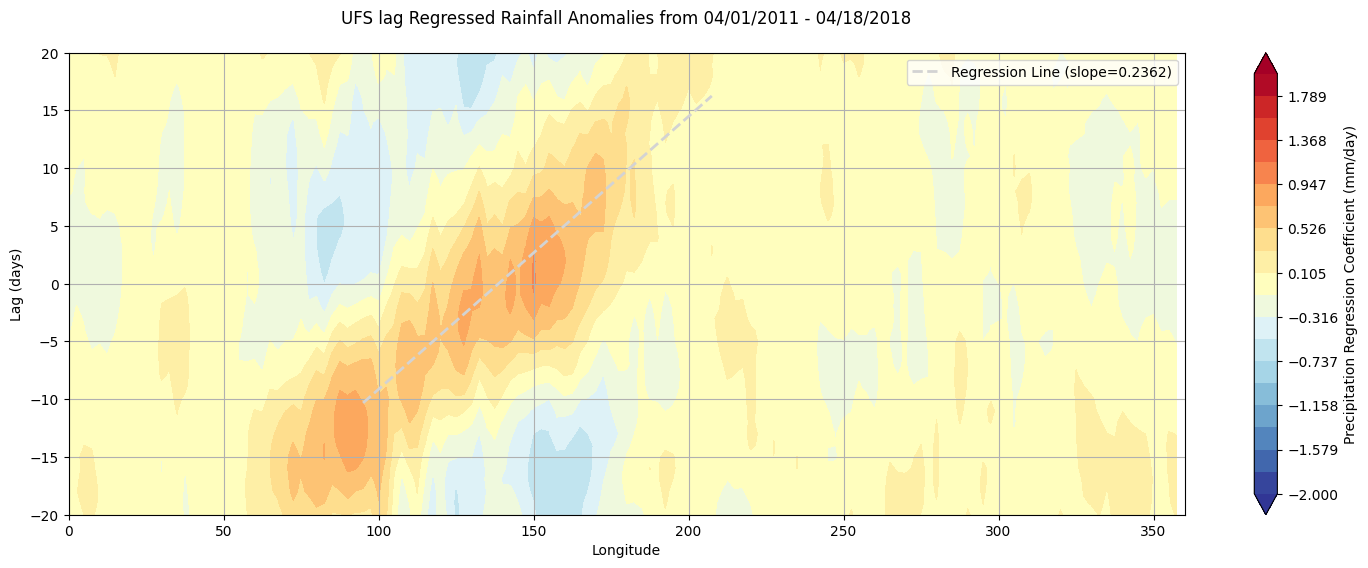

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(18, 6))

# Plot filled contours for precipitation regression coefficients
cf = plt.contourf(slope_ufs_da.longitude, slope_ufs_da.lag, slope_ufs_da, 
                             cmap='RdYlBu_r', levels=np.linspace(-2, 2, 20), extend='both')

# Color bar
cbar = plt.colorbar(cf, label='Precipitation Regression Coefficient (mm/day)')

# Overlay the regression line across the determined limits
plt.plot(regression_xlim, regression_line, color='lightgrey', linestyle='--', linewidth=2, 
         label=f'Regression Line (slope={slope:.4f})')  # Corrected closing parenthesis

# Axis labels and title
plt.xlabel('Longitude')
plt.ylabel('Lag (days)')
plt.title("UFS lag Regressed Rainfall Anomalies from 04/01/2011 - 04/18/2018\n")

# Add grid and show plot
plt.grid(True)
plt.legend()
plt.xlim([0, 360])
plt.ylim(-20, 20)  

#path = '/home/jstancz/mjo_plots/'

#filename = 'Py_kf_mjo.jpg'

#plt.savefig(path + filename, dpi=700)

plt.show()